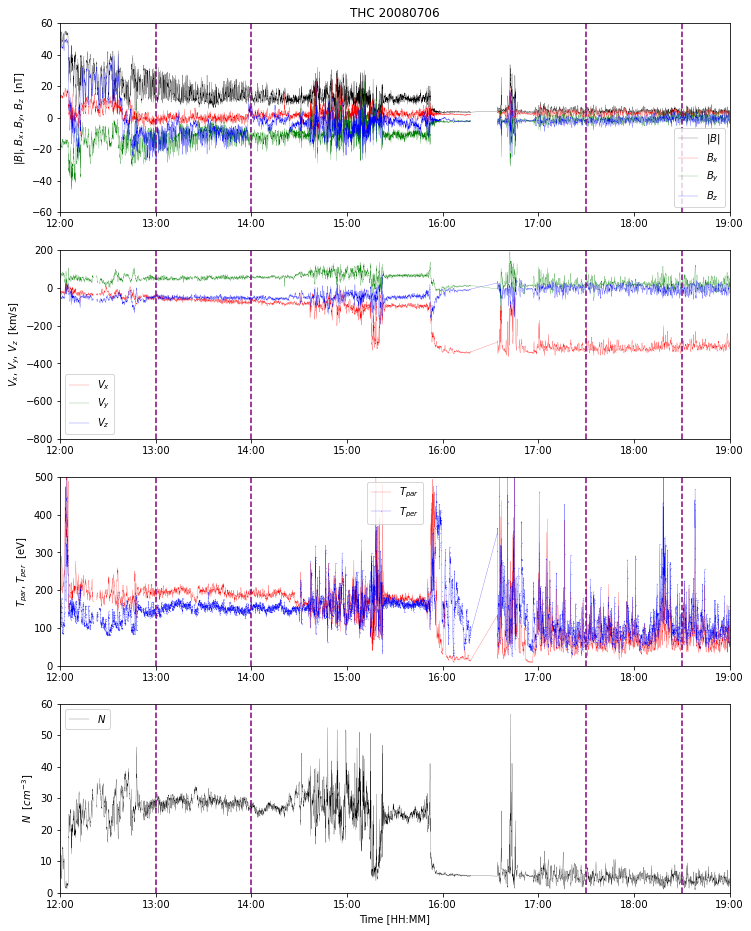

In [20]:
# fourier: It Fourier transforms the density before and after the bow-shock
#
# Developed by Dr. Gabor FACSKO (facsko.gabor@wigner.hu) in 2023
# Wigner Research Centre for Physics, Budapest, Hungary
# NASA Goddard Space Flight Center, Greenbelt, MD, USA
#
# -------------------------------------------------------------------------
#

import math 
import numpy as np
import calendar as cal
import matplotlib.dates as pdates
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import datetime, timedelta
from matplotlib.dates import (HOURLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

# Initialisation
workdir="/home/facskog/MyProjects/THEMIS/"
datafile="data_themisc-20080706.txt"
figurename=datafile[0:len(datafile)-4]

# Y axes intervalls
yIntervalls=[[-60,60],[-800,200],[0,500],[0,60]]
# This part is only for test. These values must be read from a file later. 

# Fourier intervalls
tStartSW=datetime(2008,7,6,17,30,0)
tEndSW=datetime(2008,7,6,18,30,0)
tStartMSH=datetime(2008,7,6,13,0,0)
tEndMSH=datetime(2008,7,6,14,0,0)
# This part is only for test. These values must be read from a file later. 

# Plot vertival purple dashed lines ---------------------------------------------------------
# Be careful, it is only a macro in this form
def vplot(iPlot):
    ax[iPlot].plot([tStartSW,tStartSW],yIntervalls[iPlot],
        color='Purple',linestyle='--')
    ax[iPlot].plot([tEndSW,tEndSW],yIntervalls[iPlot],
        color='Purple',linestyle='--')
    ax[iPlot].plot([tStartMSH,tStartMSH],yIntervalls[iPlot],
        color='Purple',linestyle='--')
    ax[iPlot].plot([tEndMSH,tEndMSH],yIntervalls[iPlot],
        color='Purple',linestyle='--')
# End of declaration ----------------------------------------------------------   

# Read data file 
filename=workdir+datafile
sourcefile = open(filename)
mylist = sourcefile.readlines()
# Remove the comment lines (header)
mylist_without_sharp = []
for e in mylist:
    if (not e.startswith('#')):
        mylist_without_sharp.append(e)
sourcefile.close()

# Array index for file processing
i=0
# Initialisation of time array
t = np.arange(datetime(2008,7,6,12,0,0), datetime(2008,7,6,19,59,58), timedelta(seconds=3)).astype(datetime)
# Cut the time array to the right length
t=t[0:len(mylist_without_sharp)]
# Initialisations of data arrays
a=np.zeros((len(mylist_without_sharp),12))

# Processing the file and prepare for analyzis --------------------------------------
for line in mylist_without_sharp:
    # The string is divided into fields
    split_line = line.split()
    # Process timestamp: the list is converted to string
    datestr=split_line[0]
    # Cut the timestamp only (3 digits were lost!!!)
    datestr=datestr[0:datestr.find('.')]
    # Convert string to datetime object
    datetime_object = datetime.strptime(datestr, '%Y-%m-%dT%H:%M:%S')
    t[i]=datetime_object
    # Put the righ values (B,V,N) in the right subarrays.  
    for j in range(0,12):
        astr=split_line[j+1]           
        aa=float(astr)
        a[i,j]=aa        
    # Next line
    i=i+1   
# End of file processing

# Plot data -------------------------------------------------------------------------------------
# Formate the plot (time axis)
rule = rrulewrapper(HOURLY)#, byeaster=1, interval=500)
loc = RRuleLocator(rule)
formatter = DateFormatter('%H:%M')
fig, ax = plt.subplots(4,figsize=(12,16)) # I have no clue what it is. I set here the size of the figure
# Set the date format
dates = pdates.date2num(t)
# Plot B data ------------------------------------------------------------------------------------
ax[0].plot_date(dates,a[:,0],color='Black',markersize=0.01,linestyle='-',
    linewidth=0.2,label='$|B|$')
ax[0].plot_date(dates,a[:,1],color='Red',markersize=0.01,linestyle='-',
    linewidth=0.2,label='$B_{x}$')
ax[0].plot_date(dates,a[:,2],color='Green',markersize=0.01,linestyle='-',
    linewidth=0.2,label='$B_{y}$')
ax[0].plot_date(dates,a[:,3],color='Blue',markersize=0.01,linestyle='-',
    linewidth=0.2,label='$B_{z}$')
# Fourier transformation sample limits
vplot(0)
# Appropriate y axis
ax[0].set_ylim(yIntervalls[0]); # [-60,60]
ax[0].set_title('THC 20080706')
#ax[0].set_xlabel('Time [HH:MM]')
ax[0].set_ylabel('$|B|$, $B_{x}$, $B_{y}$, $B_{z}$  [nT]')

# Appropriate x axis
min_hour=math.floor(t[0].hour+t[0].minute/60+t[0].second/3600)
min_datetime=datetime(t[0].year,t[0].month,t[0].day,min_hour,0,0)
max_hour=math.floor(t[len(mylist_without_sharp)-1].hour+
                    t[len(mylist_without_sharp)-1].minute/60
                    +t[len(mylist_without_sharp)-1].second/3600)
max_datetime=datetime(t[len(mylist_without_sharp)-1].year,
                      t[len(mylist_without_sharp)-1].month,
                      t[len(mylist_without_sharp)-1].day,max_hour,0,0)
# Set the time interval
ax[0].set_xlim([min_datetime,max_datetime]);
ax[0].xaxis.set_major_locator(loc)
ax[0].xaxis.set_major_formatter(formatter)
ax[0].xaxis.set_tick_params(rotation=0,labelsize=10)
ax[0].legend()

# Plot V data ------------------------------------------------------------------------------------
#ax[1].plot_date(dates,a[:,4],color='Black',markersize=0.1,label='$|V|$') # 
ax[1].plot_date(dates,a[:,5],color='Red',markersize=0.01,linestyle='-',
    linewidth=0.2,label='$V_{x}$')
ax[1].plot_date(dates,a[:,6],color='Green',markersize=0.01,linestyle='-',
    linewidth=0.2,label='$V_{y}$')
ax[1].plot_date(dates,a[:,7],color='Blue',markersize=0.01,linestyle='-',
    linewidth=0.2,label='$V_{z}$')
# Fourier transformation sample limits
vplot(1)
# Appropriate y axis
ax[1].set_ylim(yIntervalls[1]); # [-800,200]
#ax[1].set_title('THC 20080706')
#ax[1].set_xlabel('Time [HH:MM]')
ax[1].set_ylabel('$V_{x}$, $V_{y}$, $V_{z}$  [km/s]') # $|V|$, 

# Set the time interval
ax[1].set_xlim([min_datetime,max_datetime]);
ax[1].xaxis.set_major_locator(loc)
ax[1].xaxis.set_major_formatter(formatter)
ax[1].xaxis.set_tick_params(rotation=0,labelsize=10)
ax[1].legend()

# Plot T data ------------------------------------------------------------------------------------
#ax[2].plot_date(dates,a[:,8],color='Black',markersize=0.01,linestyle='-',
    #linewidth=0.2,label='$T$')
ax[2].plot_date(dates,a[:,9],color='Red',markersize=0.01,linestyle='-',
    linewidth=0.2,label='$T_{par}$')
ax[2].plot_date(dates,a[:,10],color='Blue',markersize=0.1,linestyle='-',
    linewidth=0.2,label='$T_{per}$')
# Fourier transformation sample limits
vplot(2)
# Appropriate y axis
ax[2].set_ylim(yIntervalls[2]); # [0,500]
#ax[2].set_title('THC 20080706')
#ax[2].set_xlabel('Time [HH:MM]')
ax[2].set_ylabel('$T_{par}$, $T_{per}$  [eV]') # $|T|$, 

# Set the time interval
ax[2].set_xlim([min_datetime,max_datetime]);
ax[2].xaxis.set_major_locator(loc)
ax[2].xaxis.set_major_formatter(formatter)
ax[2].xaxis.set_tick_params(rotation=0,labelsize=10)
ax[2].legend()

# Plot N data ------------------------------------------------------------------------------------
ax[3].plot_date(dates,a[:,11],color='Black',markersize=0.01,linestyle='-',
    linewidth=0.2,label='$N$')
# Fourier transformation sample limits
vplot(3)
# Appropriate y axis
ax[3].set_ylim(yIntervalls[3]); # [0,60]
#ax[3].set_title('THC 20080706')
ax[3].set_xlabel('Time [HH:MM]')
ax[3].set_ylabel('$N$  [$cm^{-3}$]')

# Set the time interval
ax[3].set_xlim([min_datetime,max_datetime]);
ax[3].xaxis.set_major_locator(loc)
ax[3].xaxis.set_major_formatter(formatter)
ax[3].xaxis.set_tick_params(rotation=0,labelsize=10)
ax[3].legend()

# End of plot ------------------------------------------------------------------------------------

# Save figure
plt.savefig(workdir+figurename+'.jpg',transparent=False)
# Plot figure
plt.show()